In [1]:
# Importando o Pandas

import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #Definindo comportamento do Pandas

In [2]:
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# Substituindo a variável categórica por numérica
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)
arquivo['color'] = arquivo['color'].astype('int')
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
# Definindo o limiar para corte de vinhos bons como os de qualidade >=7
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] < 7, 1, 0)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [6]:
#arquivo = arquivo.drop(['alcohol', free sulfur dioxide', total sulfur dioxide'], axis=1) # Teste removendo várias colunas com baixa correlação

arquivo = arquivo.drop(['quality'], axis=1) #Removendo a coluna 'quality' para não interferir nos cálculos do modelo para predição da variável dependente 'worst'

arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [7]:
# Exibir o percentual de cada classe
print(arquivo['worst'].value_counts(normalize=True) * 100)

worst
1    80.344775
0    19.655225
Name: proportion, dtype: float64


In [8]:
# Definindo os atributos da função de aprendizagem
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)

In [14]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color                 6497 non-null   int64  
 12  worst                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [14]:
%%time 
# Magic Function para medir o tempo de execução

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Definindo o modelo
modelo = xgb.XGBClassifier(objective='binary:logistic')

# Parâmetros para o Randomized Search
param_random = {
    'max_depth': [45, 50, 55],
    'n_estimators': [45, 50, 55],
    'learning_rate': [0.1, 0.15, 0.095]
}

#    'subsample': [0.5, 0.8, 1.0],
#    'colsample_bytree': [0.5, 0.7, 0.9]

# Configurando o GridSearchCV
# grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='accuracy', cv=2, verbose=1)

random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_random, n_iter =10, cv=2, verbose=1)

# Treinando o GridSearchCV
random_search.fit(x_train, y_train)

# Melhores parâmetros e score
print("Melhores Parâmetros:", random_search.best_params_)
print("Melhor score de acurácia:", random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Melhores Parâmetros: {'n_estimators': 55, 'max_depth': 55, 'learning_rate': 0.1}
Melhor score de acurácia: 0.8566487643586492
CPU times: user 22.6 s, sys: 250 ms, total: 22.9 s
Wall time: 6.03 s


In [15]:
#pip install xgboost

In [16]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color                 6497 non-null   int64  
 12  worst                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [17]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Criando um pipeline para escalar os dados e aplicar o XGB
modelo = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.5, colsample_bytree=0.5))  # Inicia o XGB
])

#modelo = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=50, max_depth=20, subsample=0.5, colsample_bytree=0.5)
modelo = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=50, max_depth=50, subsample=0.5, colsample_bytree=0.7)

# Treinando o modelo
modelo.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
#Realizando a Predição 
y_pred = modelo.predict(x_test)

#Verificação de Acurácia
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.8753846153846154


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 128  115]
 [  47 1010]]


In [58]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.73      0.53      0.61       243
           1       0.90      0.96      0.93      1057

    accuracy                           0.88      1300
   macro avg       0.81      0.74      0.77      1300
weighted avg       0.87      0.88      0.87      1300



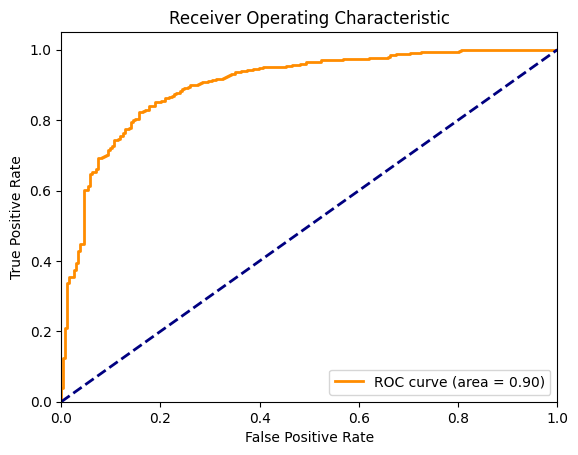

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()